# LINEAR SUPPORT VECTOR MACHINE ALGORITHM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('STRESS.csv')
df.head()

,snoring rate,respiration rate,body temperature,limb movement,blood oxygen,retina eye movement,sleeping rate,heart rate,stress level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3.0
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3.0
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1.0
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3.0
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0.0


In [3]:
df=df.dropna()

In [4]:
df.columns

Index(['snoring rate', 'respiration rate', 'body temperature', 'limb movement',
       'blood oxygen', 'retina eye movement', 'sleeping rate', 'heart rate',
       'stress level'],
      dtype='object')

In [5]:
df.head()

,snoring rate,respiration rate,body temperature,limb movement,blood oxygen,retina eye movement,sleeping rate,heart rate,stress level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3.0
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3.0
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1.0
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3.0
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0.0


In [6]:
x1 = df.drop(labels='stress level', axis=1)
y1 = df.loc[:,'stress level']

In [7]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=42)
x,y=ros.fit_resample(x1,y1)
print("OUR DATASET COUNT         : ", Counter(y1))
print("OVER SAMPLING DATA COUNT  : ", Counter(y))

OUR DATASET COUNT         :  Counter({0.0: 2521, 4.0: 2403, 2.0: 2322, 3.0: 2287, 1.0: 2251})
OVER SAMPLING DATA COUNT  :  Counter({3.0: 2521, 1.0: 2521, 0.0: 2521, 2.0: 2521, 4.0: 2521})


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)
print("NUMBER OF TRAIN DATASET    : ", len(x_train))
print("NUMBER OF TEST DATASET      : ", len(x_test))
print("TOTAL NUMBER OF DATASET    : ", len(x_train)+len(x_test))

NUMBER OF TRAIN DATASET    :  10084
NUMBER OF TEST DATASET      :  2521
TOTAL NUMBER OF DATASET    :  12605


In [9]:
print("NUMBER OF TRAIN DATASET    : ", len(y_train))
print("NUMBER OF TEST DATASET      : ", len(y_test))
print("TOTAL NUMBER OF DATASET    : ", len(y_train)+len(y_test))

NUMBER OF TRAIN DATASET    :  10084
NUMBER OF TEST DATASET      :  2521
TOTAL NUMBER OF DATASET    :  12605


In [10]:
from sklearn.svm import LinearSVC

In [11]:
lr = LinearSVC()
lr.fit(x_train,y_train)

LinearSVC()

In [12]:
predicted = lr.predict(x_test)

In [13]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,predicted)
print('THE CLASSIFICATION REPORT OF LINEAR SUPPORT VECTOR MACHINE:\n\n',cr)

THE CLASSIFICATION REPORT OF LINEAR SUPPORT VECTOR MACHINE:

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       504
         1.0       1.00      1.00      1.00       504
         2.0       0.89      1.00      0.94       504
         3.0       1.00      0.88      0.93       505
         4.0       1.00      1.00      1.00       504

    accuracy                           0.98      2521
   macro avg       0.98      0.98      0.98      2521
weighted avg       0.98      0.98      0.98      2521



In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted)
print('THE CONFUSION MATRIX SCORE OF LINEAR SUPPORT VECTOR MACHINE:\n\n\n',cm)

THE CONFUSION MATRIX SCORE OF LINEAR SUPPORT VECTOR MACHINE:


 [[504   0   0   0   0]
 [  0 504   0   0   0]
 [  0   0 504   0   0]
 [  0   0  62 443   0]
 [  0   0   0   0 504]]


In [15]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(lr, x, y, scoring='accuracy')
print('THE CROSS VALIDATION TEST RESULT OF ACCURACY :\n\n\n', accuracy*100)

THE CROSS VALIDATION TEST RESULT OF ACCURACY :


 [94.60531535 98.73066244 91.90797303 97.46132487 92.9789766 ]


In [16]:
from sklearn.metrics import accuracy_score
a = accuracy_score(y_test,predicted)
print("THE ACCURACY SCORE OF LINEAR SUPPORT VECTOR MACHINE IS :",accuracy.mean()*100)

THE ACCURACY SCORE OF LINEAR SUPPORT VECTOR MACHINE IS : 95.13685045616818


In [17]:
from sklearn.metrics import hamming_loss
hl = hamming_loss(y_test,predicted)
print("THE HAMMING LOSS OF LINEAR SUPPORT VECTOR MACHINE IS :",hl*100)

THE HAMMING LOSS OF LINEAR SUPPORT VECTOR MACHINE IS : 2.459341531138437


THE CONFUSION MATRIX SCORE OF LINEAR SUPPORT VECTOR MACHINE:


[[504   0   0   0   0]
 [  0 504   0   0   0]
 [  0   0 504   0   0]
 [  0   0  62 443   0]
 [  0   0   0   0 504]]


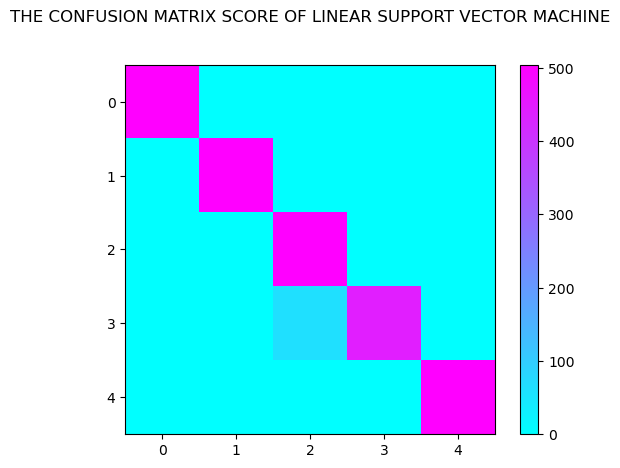

In [18]:
def plot_confusion_matrix(cm, title='THE CONFUSION MATRIX SCORE OF LINEAR SUPPORT VECTOR MACHINE\n\n', cmap=plt.cm.cool):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

cm1=confusion_matrix(y_test, predicted)
print('THE CONFUSION MATRIX SCORE OF LINEAR SUPPORT VECTOR MACHINE:\n\n')
print(cm)
plot_confusion_matrix(cm)

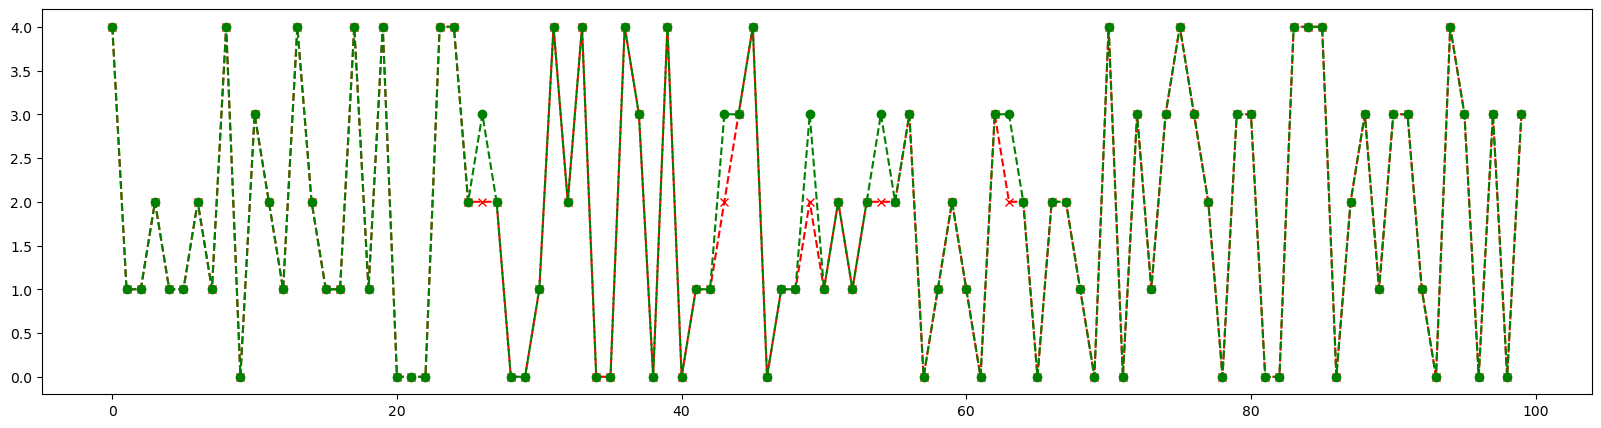

In [19]:
import matplotlib.pyplot as plt
df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()